QUESTION 3

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.layers import Dropout, BatchNormalization


BUILDING CNN MODEL WITH 5 CONVOLUTION LAYERS

In [2]:
# Variables
input_shape = (32, 32, 3)  
num_classes = 10  
conv_params = [32, 32, 64, 128, 128]  
dense_neurons = 512  
dropout_rate = 0.5  
use_batch_norm = True  

# Function to build the CNN model
def build_cnn_model(input_shape, num_classes, conv_params, dense_neurons, dropout_rate, use_batch_norm):
    model = Sequential()
    # Add the first convolutional layer
    model.add(Conv2D(conv_params[0], 
                     (3,3), 
                     padding='same',
                     input_shape=input_shape))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add subsequent convolutional layers
    for i in range(1, len(conv_params)):
        model.add(Conv2D(conv_params[i], 
                         (3,3),
                         padding='same'))
        if use_batch_norm:
            model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add the flatten layer to convert 2D output to 1D
    model.add(Flatten())
    
    # Add dropout layer
    model.add(Dropout(dropout_rate))
    
    # Add the dense layer
    model.add(Dense(dense_neurons, activation='relu'))
    
    # Add dropout layer
    model.add(Dropout(dropout_rate))
    
    # Add the output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build the model
model = build_cnn_model(input_shape, num_classes, conv_params, dense_neurons, dropout_rate, use_batch_norm)


TRAINING THE DATASET

In [3]:
train_dir = 'inaturalist_12K/train'
test_dir = 'inaturalist_12K/val'
input_shape = (32, 32, 3)
num_classes = 10
batch_size = 32
epochs =10

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2], 
    batch_size=batch_size,
    class_mode='categorical',   
)

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    epochs=epochs)

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


Epoch 1/10
281/281 [==============================] - 57s 200ms/step - loss: 2.3366 - accuracy: 0.1683 - val_loss: 2.3855 - val_accuracy: 0.1008
Epoch 2/10
281/281 [==============================] - 57s 201ms/step - loss: 2.1555 - accuracy: 0.2058 - val_loss: 2.1169 - val_accuracy: 0.2369
Epoch 3/10
281/281 [==============================] - 56s 201ms/step - loss: 2.0892 - accuracy: 0.2401 - val_loss: 2.3190 - val_accuracy: 0.1815
Epoch 4/10
281/281 [==============================] - 56s 199ms/step - loss: 2.0429 - accuracy: 0.2630 - val_loss: 2.1027 - val_accuracy: 0.2581
Epoch 5/10
281/281 [==============================] - 56s 201ms/step - loss: 2.0066 - accuracy: 0.2727 - val_loss: 2.0010 - val_accuracy: 0.2802
Epoch 6/10
281/281 [==============================] - 57s 202ms/step - loss: 1.9762 - accuracy: 0.2911 - val_loss: 2.0053 - val_accuracy: 0.2974
Epoch 7/10
281/281 [==============================] - 57s 201ms/step - loss: 1.9207 - accuracy: 0.3084 - val_loss: 2.0157 - val_ac

GRAPH FOR TRAINING ACCURACY AND LOSS

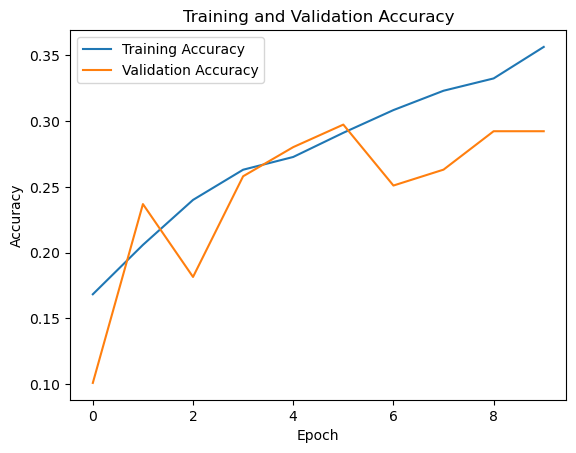

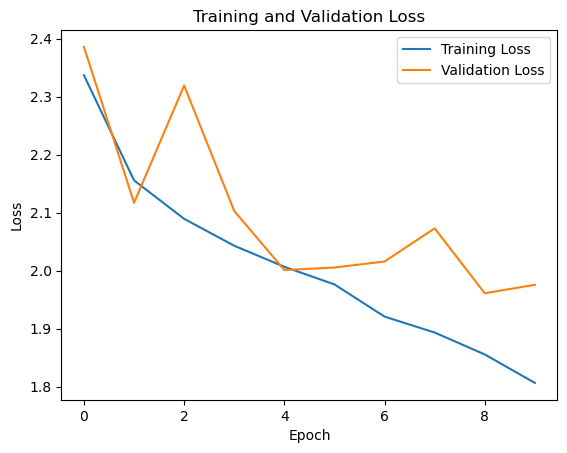

In [5]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


(a) What is the total number of computations done by your network? (assume m filters in each layer of size k× k and n neurons in the dense layer)

In [14]:
def calculate_ttl_computations(input_shape, num_layers, conv_params, dense_neurons, dropout_rate):
    total_computations = 0
    current_input_shape = input_shape

    for i in range(num_layers):
        output_height = current_input_shape[0]
        output_width = current_input_shape[1]
        conv_computations = output_height * output_width * conv_params[i] * (3 * 3 * current_input_shape[2] + 1)
        total_computations += conv_computations
        current_input_shape = (output_height // 2, output_width // 2, conv_params[i])

    flatten_size = current_input_shape[0] * current_input_shape[1] * current_input_shape[2]
    dense_computations = (flatten_size + 1) * dense_neurons
    total_computations += dense_computations

    output_computations = (dense_neurons + 1) * 10 
    total_computations += output_computations

    return total_computations

input_shape = (32, 32, 3)
conv_params = [16, 32, 64, 128, 128]
dense_neurons = 512
dropout_rate = 0.5

# Calculate total computations
total_computations = calculate_ttl_computations(input_shape, len(conv_params), conv_params, dense_neurons, dropout_rate)
print("Total computations:", total_computations)


Total computations: 4673546


(b) What is the total number of parameters in your network? (assume m filters in each layer of size k×k and n neurons in the dense layer)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        1

In [15]:
def count_parameters(model):
    total_params = sum(layer.count_params() for layer in model.layers if hasattr(layer, 'count_params'))
    return total_params

total_params = count_parameters(model)
print("Total parameters in the model:", total_params)


Total parameters in the model: 322794
